# Data Analysis: Pymaceuticals

### Observations and Insights 

• The mouse study had a total sample of 249 mice. The clean up function was deployed to identify duplicate data in this study which may lead to a false positive readings. One mouse with an ID of g989 had duplicate data before the study was subject to data analysis. The data analysis was performed from the data collected from 248 mice.

• The gender distribution for this study was 50.96% male and 49.04% female.

• Box plot demonstrated the effectiveness of the 4 promising treatment regimen (Capomulin, Ceftamin, Infubinol, and Ramicane), Mice treated with Infubinol saw the most development of tumor growth. Mice treated with Capomulin drug saw the most resistance to tumor growth.

• Outlier was identified in the box plot  for Infubinol.

• The correlation between the mouse weight, and average tumor volume is 0.84 and linear regression is: $$ r^2 = 0.71 $$ ,suggesting a strong relationship between the two variables. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on ="Mouse ID")

In [3]:
#head/column check for dataframe 1
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
#head/column check for dataframe 2
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Display the data table for preview
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice.
mice_count = len(mouse_study["Mouse ID"].unique())
mice_count

249

In [7]:
#creating subset to look for duplicates in Mouse ID and Timepoint column in the df.
subset = ["Mouse ID", "Timepoint"]

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# one duplicate ID identified that contains 5 rows!
duplicate_mouse = mouse_study.loc[     mouse_study.duplicated(subset), "Mouse ID"   ]
duplicate_mouse

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse.unique()

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = mouse_study.loc[mouse_study['Mouse ID'] == "g989",:]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mouse)==False]
clean_mouse_study.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_count = len(clean_mouse_study["Mouse ID"].unique())
clean_mouse_study_count

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])
drug_groups.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [14]:
mean_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)
median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)
variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)
sd_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)

#Get the SEM of tumor volume
sem_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

# Assemble the resulting series into a single summary dataframe.
drug_summary_df = pd.DataFrame({ "Mean Tumor Volume":mean_tv, 
                                    "Median Tumor Volume": median_tv, 
                                    "Variance Tumor Volume": variance_tv, 
                                    "Standard Deviation Tumor Volume": sd_tv,
                                     "SEM Tumor Volume":sem_tv
    
    
})

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg_df = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)
drug_summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [16]:
drug_regimen_count = drug_groups["Mouse ID"].count()
drug_regimen_count


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

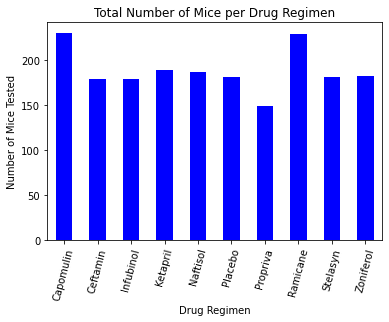

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_pdplot = drug_regimen_count.plot.bar( rot = 75, title = "Total Number of Mice per Drug Regimen", fontsize =10, color = "b")

drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Number of Mice Tested")
plt.show()

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# x-axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_axis = np.arange(len(drug_regimen_count))
y_axis = drug_regimen_count



In [19]:
#tick locations
tick_locations = [value for value in x_axis]

In [20]:
#spitting out drug names and making into an array/list to reformat for pyplot. 
drugs = list(drug_regimen_count.index.values)
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

Text(0, 0.5, 'Total Mice')

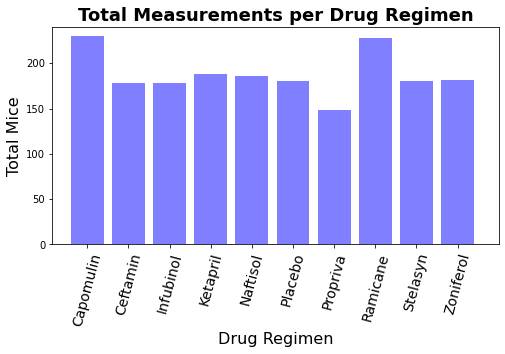

In [21]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,4))
plt.bar(x_axis, y_axis, color ='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, drugs, rotation="75", fontsize = 14)

# Set x and y limits
plt.xlim(-0.85, len(x_axis))
plt.ylim(0, max(drug_regimen_count)+10)

# Set a Title and labels
plt.title("Total Measurements per Drug Regimen",fontsize=18, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice",fontsize=16)
#plt.autoscale(enable=True, axis='x', tight=True)
#plt.tight_layout()

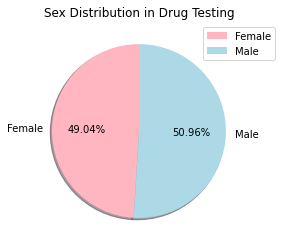

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_mouse_study.groupby(["Sex"]).count()
# Create a pie chart based upon the trip duration of that single bike
mice_piepd = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),
                            colors = ["lightpink","lightblue"],autopct = "%.2f%%", shadow = True,startangle=90)

#Put y label empty so it doesn't crach with Female
mice_piepd.set_ylabel("")

#Put label and adjust it with bbox_to_anchor so it is not on top of your graph
mice_piepd.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))

Male      958
Female    922
Name: Sex, dtype: int64

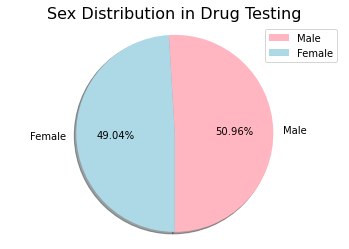

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_mouse_study["Sex"].value_counts()
#Create variables to use in pie chart 

explode = (0,0)
colors =["lightpink","lightblue"]
labels = list(mice_sex.index)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mice_sex, explode=explode, labels=labels, colors = colors,
        autopct="%1.2f%%", shadow=True, startangle=270) 
 #Create axes which are equal so we have a perfect circle
plt.title("Sex Distribution in Drug Testing",fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
mice_sex


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_mouse_study_bymouseID = clean_mouse_study.groupby(['Mouse ID'])['Timepoint']
clean_mouse_study_bymouseID.max()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [29]:
clean_mouse_study_bymouseID_max = clean_mouse_study_bymouseID.max()
clean_mouse_study_bymouseID_max

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs_df = pd.merge(clean_mouse_study_bymouseID_max , clean_mouse_study, how="left", on=(["Mouse ID","Timepoint"]))
drugs_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    drugs_regimen = drugs_df.loc[drugs_df["Drug Regimen"] == treatment]
    tumor_vol= drugs_regimen['Tumor Volume (mm3)']
    
    # add subset or append tumor data to new list 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds. power of for loop!
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = (quartiles[0.25]).round(2)
    upperq = (quartiles[0.75]).round(2)
    iqr = (upperq-lowerq).round(2)
    print("-------------------------------------------------------------------")
    print(f'For {treatment}, Interquartile Range (IQR) is {iqr}.')
   
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    print(f'For {treatment}, values below {lower_bound} and values above {upper_bound} could be an outlier.\n')
    

-------------------------------------------------------------------
For Capomulin, Interquartile Range (IQR) is 7.78.
For Capomulin, values below 20.71 and values above 51.83 could be an outlier.

-------------------------------------------------------------------
For Ramicane, Interquartile Range (IQR) is 9.1.
For Ramicane, values below 17.91 and values above 54.31 could be an outlier.

-------------------------------------------------------------------
For Infubinol, Interquartile Range (IQR) is 11.48.
For Infubinol, values below 36.83 and values above 82.75 could be an outlier.

-------------------------------------------------------------------
For Ceftamin, Interquartile Range (IQR) is 15.58.
For Ceftamin, values below 25.35 and values above 87.67 could be an outlier.



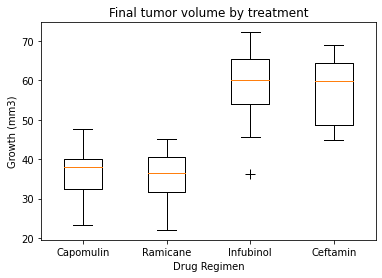

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flier_props = dict(marker='+', markersize=10,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume by treatment')
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Growth (mm3)')
ax1.boxplot(tumor_vol_data, flierprops = flier_props, labels = treatments)
plt.show()

## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = clean_mouse_study.loc[  clean_mouse_study["Drug Regimen"] == "Capomulin", :   ]
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [35]:
capomulin_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [36]:
#Chose mice l509 as directed by our instructor 07/26/2022
Mouse_l509 = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "l509"]

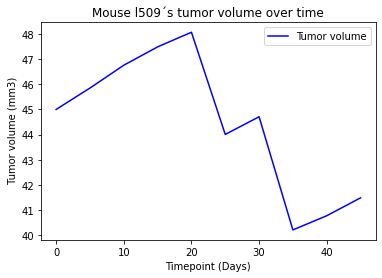

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Make variables to plot 
time_x = Mouse_l509["Timepoint"]
tumor_y = Mouse_l509["Tumor Volume (mm3)"]

# Plot our line that will be used to 
plt.plot(time_x, tumor_y, color="blue", label="Tumor volume", linestyle = "solid")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse l509´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_group =capomulin_mice.groupby(["Mouse ID"]).mean()
capomulin_group.head()

#Get average tumor volumen
avg_tumor_vol = capomulin_group["Weight (g)"]
avg_weight = capomulin_group["Tumor Volume (mm3)"]

Text(0, 0.5, 'Average Tumor Volume (mm3)')

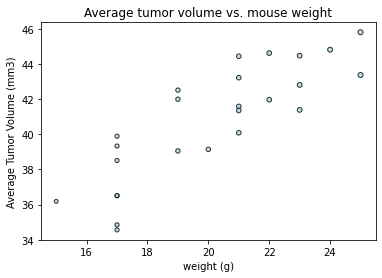

In [40]:
#comments rephrase them from below plz.
#Create scatterplot 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="lightblue", edgecolors="black",
            s=avg_tumor_vol, alpha=0.80)
#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


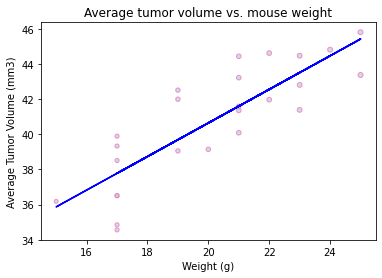

In [41]:
# Equations for correlation and regression
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

#scatterplot
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="lightblue", edgecolors="hotpink",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)